In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import uproot
import numpy as np

In [26]:
dfsData = []
dfsDataLite = []
# with uproot.open('/home/mdicosta/LocalTestsO2/corrbkgs/AO2D_train_509928.root') as f:
# with uproot.open('Tree_input_mc_corrbkgs_derived.root') as f:
with uproot.open('Tree_LHC25e3.root') as f:
    print(f.keys())
    for iKey, key in enumerate(f.keys()):
        if 'O2hfcanddpfullp' in key:
            print(key)
            dfData = f[key].arrays(library='pd')
            dfsData.append(dfData)

full_df = pd.concat([df for df in dfsData], ignore_index=True)
print(f"len(full_df): {len(full_df)}")

['DF_2342333492057724;1', 'DF_2342333492057724/O2hfcanddpfullp;1', 'DF_2342333492057724/O2hfcanddplite;1', 'parentFiles;1']
DF_2342333492057724/O2hfcanddpfullp;1
len(full_df): 7734


In [27]:
data = full_df['fFlagMcDecayChanGen']

# Compute histogram
counts, bin_edges = np.histogram(data, bins=28, range=(0, 29))

# Print bin contents
for i in range(len(counts)):
    print(f"Bin {i + 1}: Range ({bin_edges[i]}, {bin_edges[i+1]}) -> Count: {counts[i]}")

Bin 1: Range (0.0, 1.0357142857142858) -> Count: 4059
Bin 2: Range (1.0357142857142858, 2.0714285714285716) -> Count: 0
Bin 3: Range (2.0714285714285716, 3.1071428571428577) -> Count: 0
Bin 4: Range (3.1071428571428577, 4.142857142857143) -> Count: 0
Bin 5: Range (4.142857142857143, 5.178571428571429) -> Count: 0
Bin 6: Range (5.178571428571429, 6.214285714285715) -> Count: 190
Bin 7: Range (6.214285714285715, 7.250000000000001) -> Count: 112
Bin 8: Range (7.250000000000001, 8.285714285714286) -> Count: 202
Bin 9: Range (8.285714285714286, 9.321428571428573) -> Count: 116
Bin 10: Range (9.321428571428573, 10.357142857142858) -> Count: 8
Bin 11: Range (10.357142857142858, 11.392857142857144) -> Count: 155
Bin 12: Range (11.392857142857144, 12.42857142857143) -> Count: 3
Bin 13: Range (12.42857142857143, 13.464285714285715) -> Count: 89
Bin 14: Range (13.464285714285715, 14.500000000000002) -> Count: 402
Bin 15: Range (14.500000000000002, 15.535714285714286) -> Count: 248
Bin 16: Range (

In [28]:

# Extract the data
data = full_df['fFlagMcMatchGen']

# Compute histogram
counts, bin_edges = np.histogram(data, bins=46, range=(-23, 23))

# Print bin contents
for i in range(len(counts)):
    print(f"Bin {i + 1}: Range ({bin_edges[i]}, {bin_edges[i+1]}) -> Count: {counts[i]}")

Bin 1: Range (-23.0, -22.0) -> Count: 33
Bin 2: Range (-22.0, -21.0) -> Count: 36
Bin 3: Range (-21.0, -20.0) -> Count: 47
Bin 4: Range (-20.0, -19.0) -> Count: 499
Bin 5: Range (-19.0, -18.0) -> Count: 478
Bin 6: Range (-18.0, -17.0) -> Count: 88
Bin 7: Range (-17.0, -16.0) -> Count: 334
Bin 8: Range (-16.0, -15.0) -> Count: 312
Bin 9: Range (-15.0, -14.0) -> Count: 149
Bin 10: Range (-14.0, -13.0) -> Count: 121
Bin 11: Range (-13.0, -12.0) -> Count: 189
Bin 12: Range (-12.0, -11.0) -> Count: 81
Bin 13: Range (-11.0, -10.0) -> Count: 378
Bin 14: Range (-10.0, -9.0) -> Count: 180
Bin 15: Range (-9.0, -8.0) -> Count: 224
Bin 16: Range (-8.0, -7.0) -> Count: 220
Bin 17: Range (-7.0, -6.0) -> Count: 220
Bin 18: Range (-6.0, -5.0) -> Count: 69
Bin 19: Range (-5.0, -4.0) -> Count: 205
Bin 20: Range (-4.0, -3.0) -> Count: 0
Bin 21: Range (-3.0, -2.0) -> Count: 0
Bin 22: Range (-2.0, -1.0) -> Count: 0
Bin 23: Range (-1.0, 0.0) -> Count: 0
Bin 24: Range (0.0, 1.0) -> Count: 0
Bin 25: Range (1.

In [29]:
import numpy as np

data = full_df['fFlagMcMatchGen']
counts, bin_edges = np.histogram(data, bins=46, range=(-23, 23))

# Width of each bin
bin_width = bin_edges[1] - bin_edges[0]

# Compare symmetric bins
num_bins = len(counts)
half_bins = num_bins // 2

print("Symmetric bin comparison (negative vs positive):")
for i in range(half_bins):
    left_bin_range = (bin_edges[i], bin_edges[i + 1])
    right_bin_range = (bin_edges[-(i + 2)], bin_edges[-(i + 1)])
    
    left_count = counts[i]
    right_count = counts[-(i + 1)]
    
    print(f"Bin {i + 1}:")
    print(f"  Left  {left_bin_range} -> Count: {left_count}")
    print(f"  Right {right_bin_range} -> Count: {right_count}")
    print(f"  Difference: {abs(left_count - right_count)}\n")


Symmetric bin comparison (negative vs positive):
Bin 1:
  Left  (-23.0, -22.0) -> Count: 33
  Right (22.0, 23.0) -> Count: 79
  Difference: 46

Bin 2:
  Left  (-22.0, -21.0) -> Count: 36
  Right (21.0, 22.0) -> Count: 37
  Difference: 1

Bin 3:
  Left  (-21.0, -20.0) -> Count: 47
  Right (20.0, 21.0) -> Count: 445
  Difference: 398

Bin 4:
  Left  (-20.0, -19.0) -> Count: 499
  Right (19.0, 20.0) -> Count: 526
  Difference: 27

Bin 5:
  Left  (-19.0, -18.0) -> Count: 478
  Right (18.0, 19.0) -> Count: 95
  Difference: 383

Bin 6:
  Left  (-18.0, -17.0) -> Count: 88
  Right (17.0, 18.0) -> Count: 382
  Difference: 294

Bin 7:
  Left  (-17.0, -16.0) -> Count: 334
  Right (16.0, 17.0) -> Count: 283
  Difference: 51

Bin 8:
  Left  (-16.0, -15.0) -> Count: 312
  Right (15.0, 16.0) -> Count: 176
  Difference: 136

Bin 9:
  Left  (-15.0, -14.0) -> Count: 149
  Right (14.0, 15.0) -> Count: 154
  Difference: 5

Bin 10:
  Left  (-14.0, -13.0) -> Count: 121
  Right (13.0, 14.0) -> Count: 179
  D

<Axes: >

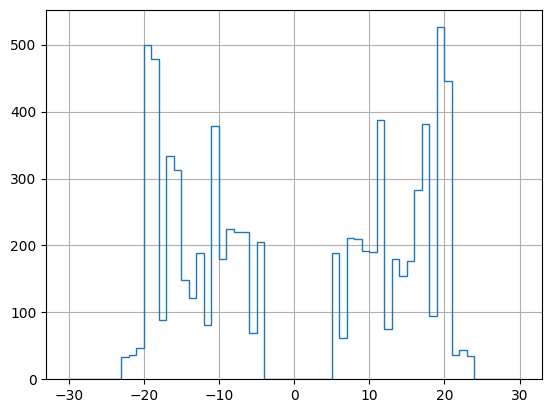

In [30]:
full_df['fFlagMcMatchGen'].hist(bins=60, range=(-30, 30), histtype='step', label='fFlagMcMatchGen')

In [31]:
print(full_df.columns)

Index(['fPt', 'fEta', 'fPhi', 'fY', 'fFlagMcMatchGen', 'fFlagMcDecayChanGen',
       'fOriginMcGen'],
      dtype='object')


In [32]:
unique_values = sorted(full_df['fFlagMcMatchGen'].unique())
print("Unique values in fFlagMcMatchGen:", unique_values)

full_df = full_df[full_df['fFlagMcMatchGen'] != 0]
print(f"Unique values in fFlagMcMatchGen after filtering: {sorted(full_df['fFlagMcMatchGen'].unique())}")
print(f"len(full_df) after filtering: {len(full_df)}")

Unique values in fFlagMcMatchGen: [-23, -22, -21, -20, -19, -18, -17, -16, -15, -14, -13, -12, -11, -10, -9, -8, -7, -6, -5, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
Unique values in fFlagMcMatchGen after filtering: [-23, -22, -21, -20, -19, -18, -17, -16, -15, -14, -13, -12, -11, -10, -9, -8, -7, -6, -5, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
len(full_df) after filtering: 7734


In [33]:
unique_values = sorted(full_df['fFlagMcDecayChanGen'].unique())
print("Unique values in fFlagMcDecayChanGen:", unique_values)

Unique values in fFlagMcDecayChanGen: [0, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [34]:
unique_values = sorted(full_df['fFlagMcMatchGen'].unique())
print("Number of unique values in fFlagMcMatchGen:", len(unique_values))
print("Unique values in fFlagMcMatchGen:", unique_values)

Number of unique values in fFlagMcMatchGen: 38
Unique values in fFlagMcMatchGen: [-23, -22, -21, -20, -19, -18, -17, -16, -15, -14, -13, -12, -11, -10, -9, -8, -7, -6, -5, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]


In [35]:
# Check if all resonant flags have been activated
particles = {
    'Dplus': [1, 4],
    'Ds': [5, 9],
    'Dstar': [10, 16],
    'Lc': [17, 20],
    'Xic': [21, 23],
}

for particle, flag_range in particles.items():
    filtered_df = full_df[
        (abs(full_df['fFlagMcMatchGen']) >= flag_range[0]) &
        (abs(full_df['fFlagMcMatchGen']) <= flag_range[1])
    ].copy()  # Ensure it's a separate copy

    unique_fin_states = filtered_df['fFlagMcMatchGen'].unique()
    unique_fin_states_sorted = sorted(unique_fin_states)  # Sort in increasing order

    unique_dec_chns = filtered_df['fFlagMcDecayChanGen'].unique()
    unique_dec_chns_sorted = sorted(unique_dec_chns)  # Sort in increasing order

    print(f"[{particle}]:\n\tNCands: {len(filtered_df)}, \n\tUnique values in fFlagMcMatchGen after filtering (sorted): {unique_fin_states_sorted} \n\tUnique values in fFlagMcDecayChanGen after filtering (sorted): {unique_dec_chns_sorted}")

[Dplus]:
	NCands: 0, 
	Unique values in fFlagMcMatchGen after filtering (sorted): [] 
	Unique values in fFlagMcDecayChanGen after filtering (sorted): []
[Ds]:
	NCands: 1800, 
	Unique values in fFlagMcMatchGen after filtering (sorted): [-9, -8, -7, -6, -5, 5, 6, 7, 8, 9] 
	Unique values in fFlagMcDecayChanGen after filtering (sorted): [0, 6, 7, 8, 9, 10, 11, 12, 13, 14]
[Dstar]:
	NCands: 2855, 
	Unique values in fFlagMcMatchGen after filtering (sorted): [-16, -15, -14, -13, -12, -11, -10, 10, 11, 12, 13, 14, 15, 16] 
	Unique values in fFlagMcDecayChanGen after filtering (sorted): [0, 15, 16, 17, 18, 19, 20, 21, 22, 23]
[Lc]:
	NCands: 2847, 
	Unique values in fFlagMcMatchGen after filtering (sorted): [-20, -19, -18, -17, 17, 18, 19, 20] 
	Unique values in fFlagMcDecayChanGen after filtering (sorted): [0, 24, 25, 26, 29]
[Xic]:
	NCands: 232, 
	Unique values in fFlagMcMatchGen after filtering (sorted): [-23, -22, -21, 21, 22, 23] 
	Unique values in fFlagMcDecayChanGen after filtering (sort

In [36]:
unique_values = full_df['fFlagMcDecayChanGen'].unique()
print("Unique values in fFlagMcDecayChanGen:", unique_values)

Unique values in fFlagMcDecayChanGen: [ 0 15 18 20  6 29 27 25 14 23 26  9 28 24 16 11 19  8 13 22  7 21 17 12
 10]


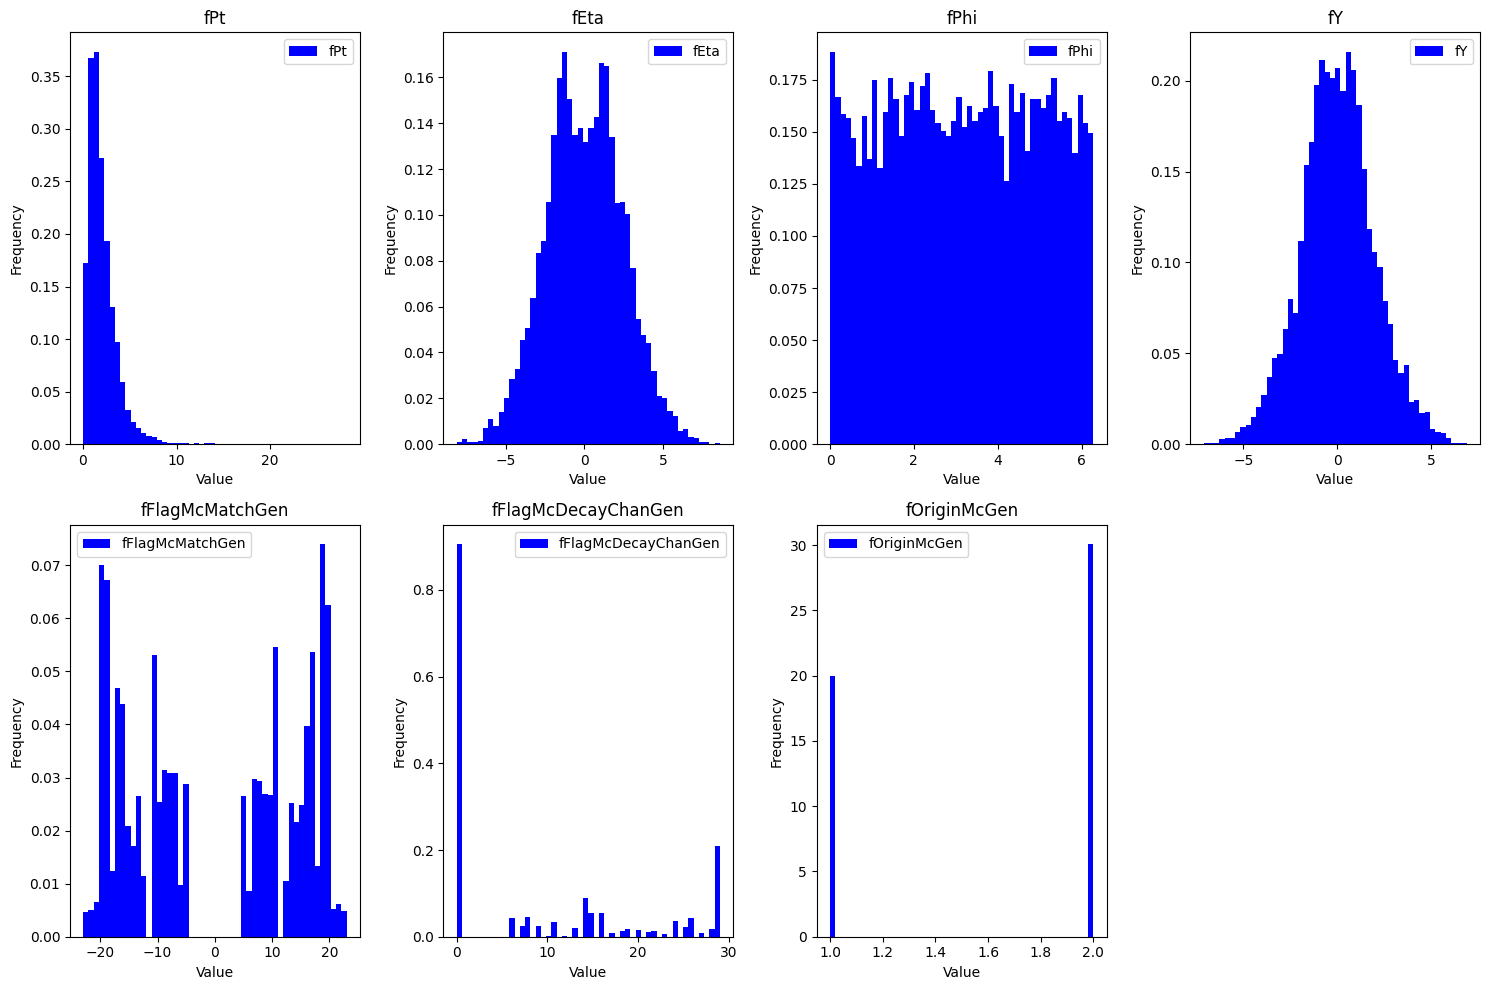

In [37]:
n_columns = len(full_df.columns)
n_rows = (n_columns // 4) + (1 if n_columns % 4 else 0)

fig, axes = plt.subplots(n_rows, 4, figsize=(15, 5 * n_rows))
axes = axes.flatten()

for i, column in enumerate(full_df.columns):
    data = full_df[column]
    finite_data = data[np.isfinite(data)]  # Filter out NaN and inf

    if len(finite_data) == 0:
        axes[i].set_visible(False)
        continue

    axes[i].hist(finite_data, bins=50, density=True, color='blue')
    axes[i].set_title(f'{column}')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')
    axes[i].legend([column])

# Hide any unused axes
for i in range(n_columns, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()
